In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_fake = pd.read_csv('../data/raw/Fake.csv')
df_real = pd.read_csv('../data/raw/True.csv')

In [3]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
# Add labels
df_fake['label'] = 0
df_real['label'] = 1

In [ ]:
# Combine
df = pd.concat([df_fake, df_real]).sample(frac=1, random_state=42).reset_index(drop=True)
# Show the first few rows
df.head()

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


In [6]:
# Basic info
print(df.head())
print(df['label'].value_counts())

                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  label  
0    February 13, 2017      0  
1       April 5, 2017       1  
2  September 27, 2017       1  
3         May 22, 2017      0  
4       June 24, 2016       1  
label
0    23481
1    21417
Name: count, dtype: in

In [10]:
print(f"Duplicates: {df.duplicated().sum()}")

Duplicates: 209


In [11]:
df = df.drop_duplicates()

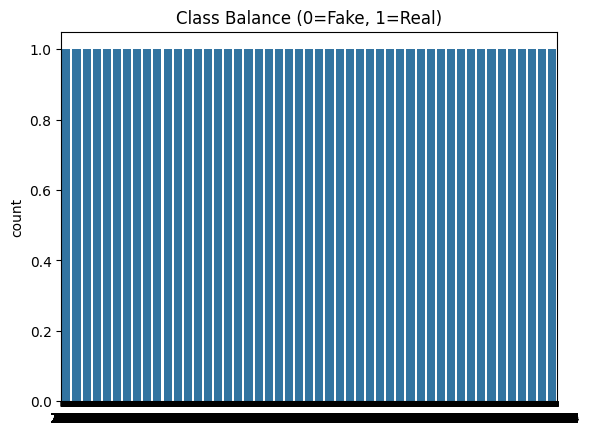

In [12]:
# Plot class balance
sns.countplot(df['label'])
plt.title('Class Balance (0=Fake, 1=Real)')
plt.show()

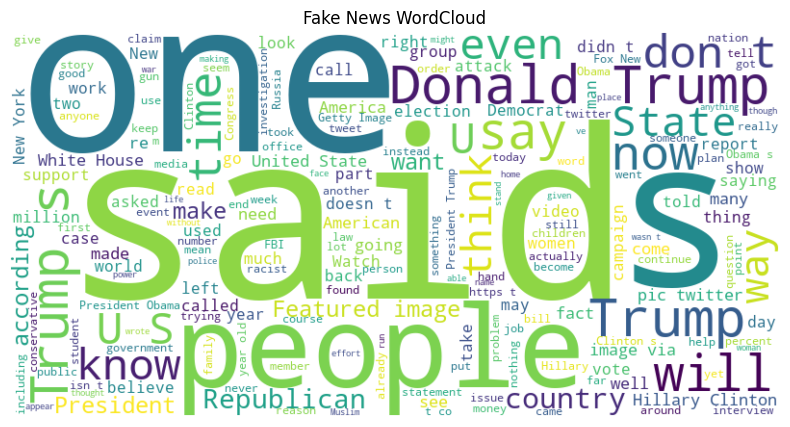

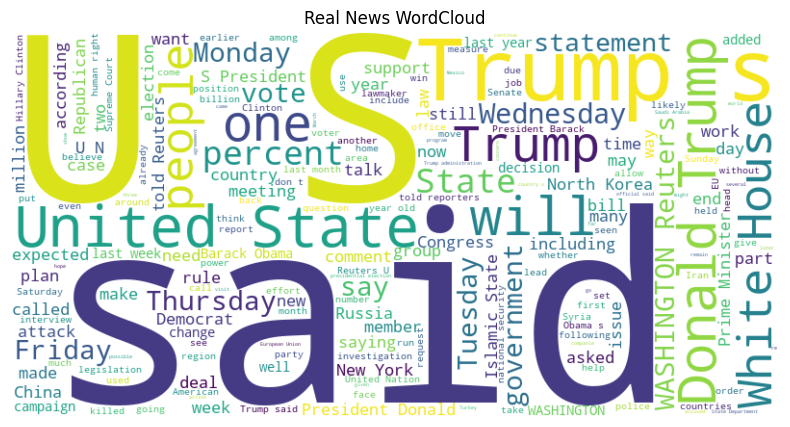

In [13]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(df[df['label']==0]['text'], 'Fake News WordCloud')
plot_wordcloud(df[df['label']==1]['text'], 'Real News WordCloud')

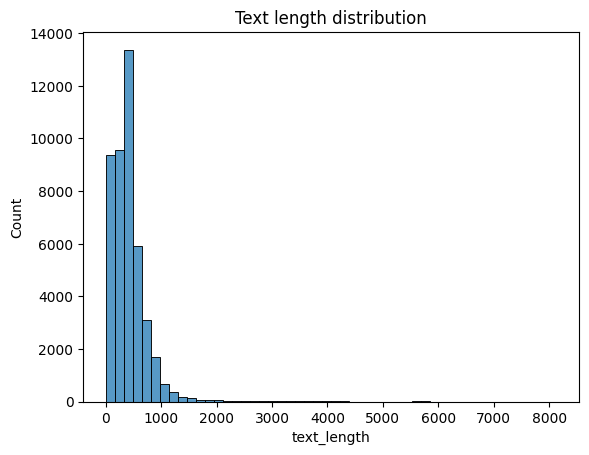

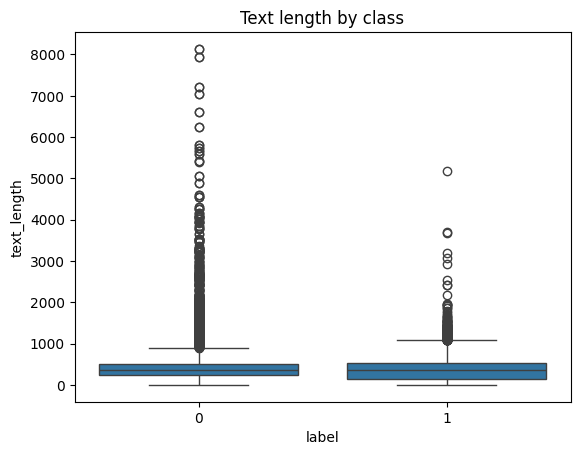

In [14]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(df['text_length'], bins=50)
plt.title('Text length distribution')
plt.show()

# Compare by class
sns.boxplot(x='label', y='text_length', data=df)
plt.title('Text length by class')
plt.show()


## Preprocessing

In [15]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Download stopwords once
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove stopwords + stem
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [17]:
# Apply cleaning
df['clean_text'] = df['text'].apply(lambda x: clean_text(str(x)))

In [18]:
print(df['clean_text'].head())

0    st centuri wire say ben stein reput professor ...
1    washington reuter us presid donald trump remov...
2    reuter puerto rico governor ricardo rossello s...
3    monday donald trump embarrass countri accident...
4    glasgow scotland reuter us presidenti candid g...
Name: clean_text, dtype: object


## Model Building

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, random_state=42
)

In [20]:
# TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [21]:
# Training a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [22]:
y_pred = model.predict(X_test_tfidf)

In [23]:
# Evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4652
           1       0.98      0.99      0.99      4286

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938

[[4575   77]
 [  33 4253]]


## LSTM Model

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

In [33]:
# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [34]:
# Pad sequences
max_len = 500 
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')


In [35]:
print(X_train_pad.shape, X_test_pad.shape)
print(X_train_pad[0])  # peek at one sequence


(35751, 500) (8938, 500)
[4134 4155   66  359  517  577  344  607 4037   52  101    7  948 1205
    5    5  248   12  582  541   43  179 1723  148  344   52  371   35
  122  231 4118  344  339  714  148   77  471 3338  406  153  385   11
    1  148  584 2157 8181   50  101  344   77  193  189  174    5    5
  513  157  309  131   70  699  466  176  193  348  789   56  470 4155
  323   63 4134 4155    1 2855  344 4037    1 9439  622 2802  234   63
 3087 5101    1  818 4155   16  344 4037  728  670 1153  186   24   16
   77  426 1602   96  456  423   66   33 1812  543   15 4037  133   16
   46    7 1764 4037   52   11  505  348  295 4155  671 4025   33  897
   55   99 3398    1  344  339  302  399 3275   42  122    7   50  543
  964 1355   81 2048 2620   36    9    1    1   80  110  926  785    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(128)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

c:\Users\karan\Desktop\Fake news project\fake-news-project\venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [38]:
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
model_lstm.build(input_shape=(None, max_len))
model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 500, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,543,425 (5.89 MB)

 Trainable params: 1,543,425 (5.89 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [41]:
history = model_lstm.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    callbacks=[es]
)

Epoch 1/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 505s 1s/step - accuracy: 0.9260 - loss: 0.1610 - val_accuracy: 0.9969 - val_loss: 0.0120
Epoch 2/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 543s 1s/step - accuracy: 0.9983 - loss: 0.0078 - val_accuracy: 0.9975 - val_loss: 0.0056
Epoch 3/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 562s 1s/step - accuracy: 0.9993 - loss: 0.0030 - val_accuracy: 0.9980 - val_loss: 0.0046
Epoch 4/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 508s 1s/step - accuracy: 0.9997 - loss: 0.0016 - val_accuracy: 0.9955 - val_loss: 0.0102
Epoch 5/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 559s 1s/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9980 - val_loss: 0.0072


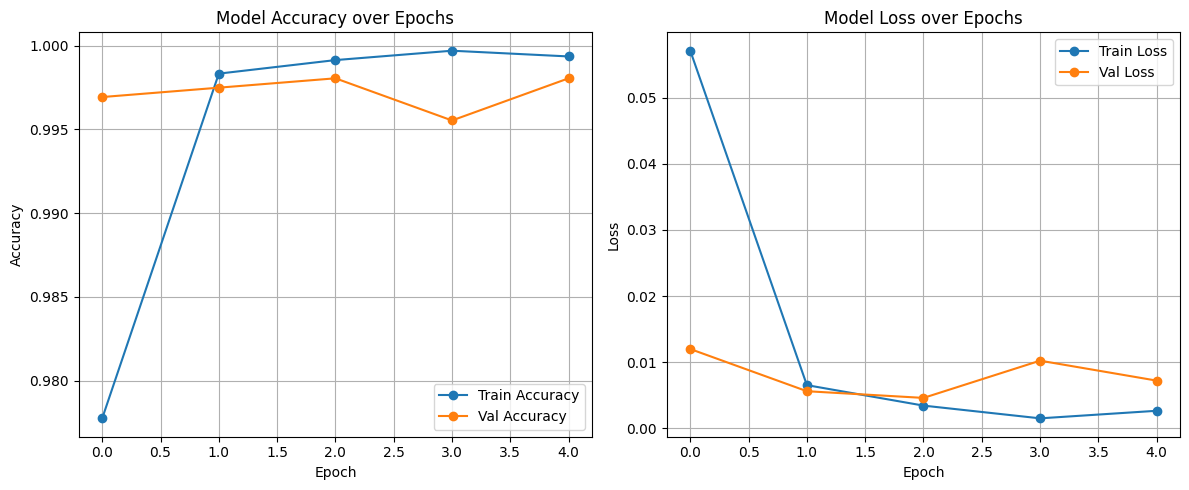

In [43]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
    plt.title('Model Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
    plt.title('Model Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function
plot_history(history)


In [44]:
model_lstm.save('models/fake_news_lstm_model.h5')
